# Load packages

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the file

In [40]:
file_path = "C:/Users/Cloud/Documents/ML-group/data/fullData.csv"
data = pd.read_csv(file_path)

df = pd.DataFrame(data)
df = df.drop(columns=['is_interleague','pos7_int_start_distance_p','pos8_int_start_distance_p','pos5_int_start_distance_p','pos3_int_start_distance_p','pos9_int_start_distance_p','pos4_int_start_distance_p','pos6_int_start_distance_p',
                      'team_id','days_since_last_game','series_game_number','scoreLine','start_time','series_id','team_side','date','JOIN','time_of_day', 'sky', 'field_condition', 'precipitation', 'wind_direction', 'park_id', 'attendance', 'wind_speed_mph', 'dayOfWeek','pos3_int_start_distance_h','pos4_int_start_distance_h', 'pos5_int_start_distance_h', 'pos6_int_start_distance_h', 'pos7_int_start_distance_h','pos8_int_start_distance_h', 'pos9_int_start_distance_h','opp_ScoreLine'])

In [41]:
df.head(3)

,doubleheader,temperature_fahrenheit,season_game_number,pitches_p,ba_p,iso_p,babip_p,slg_p,woba_p,xwoba_p,...,swings_h,takes_h,eff_min_vel_h,release_extension_h,pitcher_run_exp_h,run_exp_h,duration,score,opp_score,winLoss
0,0,38,1,153,0.324,0.118,0.407,0.441,0.366,0.341,...,78,113,-6.5,6.65,-5.5,5.5,190,10,9,Win
1,0,38,1,191,0.395,0.263,0.464,0.658,0.498,0.462,...,72,81,-2.7,6.52,-2.4,2.4,190,9,10,Loss
2,0,42,1,133,0.138,0.000,0.235,0.138,0.206,0.234,...,59,65,0.5,6.47,0.6,-0.6,141,4,0,Win


In [42]:
df.dtypes

doubleheader                int64
temperature_fahrenheit      int64
season_game_number          int64
pitches_p                   int64
ba_p                      float64
iso_p                     float64
babip_p                   float64
slg_p                     float64
woba_p                    float64
xwoba_p                   float64
xba_p                     float64
hits_p                      int64
abs_p                       int64
launch_speed_p            float64
launch_angle_p            float64
spin_rate_p                 int64
velocity_p                float64
effective_speed_p         float64
whiffs_p                    int64
swings_p                    int64
takes_p                     int64
eff_min_vel_p             float64
release_extension_p       float64
pitcher_run_exp_p         float64
run_exp_p                 float64
pitches_h                   int64
ba_h                      float64
iso_h                     float64
babip_h                   float64
slg_h         

# Random Forest Analysis

In [43]:
# Assuming 'X' is a pandas DataFrame
missing_values_count = df.isna().sum()

# To print the count of missing values for each column
print(missing_values_count)

doubleheader              0
temperature_fahrenheit    0
season_game_number        0
pitches_p                 0
ba_p                      0
iso_p                     0
babip_p                   0
slg_p                     0
woba_p                    0
xwoba_p                   0
xba_p                     0
hits_p                    0
abs_p                     0
launch_speed_p            0
launch_angle_p            0
spin_rate_p               0
velocity_p                0
effective_speed_p         0
whiffs_p                  0
swings_p                  0
takes_p                   0
eff_min_vel_p             0
release_extension_p       0
pitcher_run_exp_p         0
run_exp_p                 0
pitches_h                 0
ba_h                      0
iso_h                     0
babip_h                   0
slg_h                     0
woba_h                    0
xwoba_h                   0
xba_h                     0
hits_h                    0
abs_h                     0
launch_speed_h      

In [52]:
# Encode the 'winLoss' column
label_encoder = LabelEncoder()
df['winLoss'] = label_encoder.fit_transform(df['winLoss'])

# Split the data into features and target
X = df[['babip_p', 'babip_h', 'xba_h', 'xba_p', 'iso_p', 'iso_h', 'xwoba_p', 'xwoba_h', 'hits_p', 'hits_h', 'ba_h', 'ba_p', 'slg_p', 'slg_h', 'woba_h', 'woba_p']]
y = df['winLoss']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Accuracy: 0.838477366255144
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       506
           1       0.82      0.85      0.83       466

    accuracy                           0.84       972
   macro avg       0.84      0.84      0.84       972
weighted avg       0.84      0.84      0.84       972

         importance
woba_h     0.153803
woba_p     0.144049
slg_p      0.104546
slg_h      0.093033
ba_h       0.083648
ba_p       0.070963
iso_p      0.044268
xwoba_h    0.044138
xwoba_p    0.041470
iso_h      0.038934
xba_p      0.031604
hits_h     0.031366
babip_h    0.031360
xba_h      0.030200
babip_p    0.028796
hits_p     0.027823


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [46]:
# Function to plot the learning curve
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.array([5,10,50,100, 200])):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

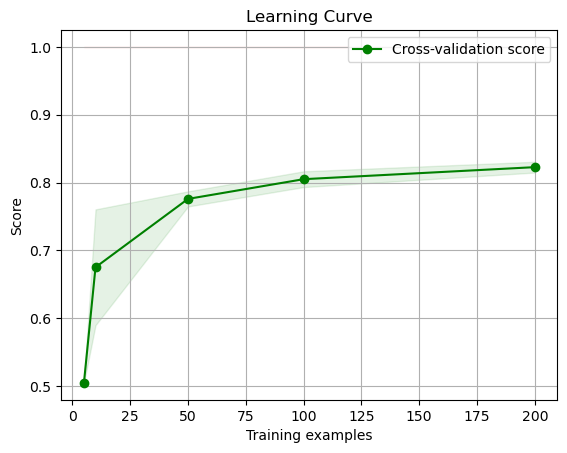

In [47]:
# Plot the learning curve using the RandomForestClassifier and your data
plot_learning_curve(rf_classifier, X_train, y_train, cv=5, n_jobs=-1)

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Cross-Validation to Evaluate Model Performance

In [49]:
from sklearn.model_selection import cross_val_score

# Cross-validation to evaluate the model
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.85218509 0.84447301 0.85347044 0.83268983 0.84169884]
Mean cross-validation score: 0.8449034418186088
